# Exercise 2. Quantum Expectation

In [1]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.opflow import One, Zero, Plus, Minus
from qiskit.opflow import I, X, Y, Z, S, H
from qiskit.visualization import plot_bloch_multivector, plot_bloch_vector, plot_histogram
from math import pi, sqrt, acos, asin, e, log, sin, cos
from numpy import angle

<div class="alert alert-block alert-success">

**Readme**  
    
There are 7 questions (marked in Green) in total in this Jupyter notebook. These questions will teach you how to use the opflow library and how to evaluate expectation on quantum circuit.
</div>

## 2.1 Introduction to Opflow library

Opflow library is probably the most convenient library introduced in Qiskit. It allows for algebraic manipulation of quantum states, expectation values, and more. Here, we will learn to use the opflow library at a basic level.



### State

States are important construct to represent the quantum system. We have already seen the states $|0\rangle$, $|1\rangle$, $|+\rangle$, $|-\rangle$ during lectures. Here they can easily built with opflow library. Remember,

$|+\rangle = \frac{1}{\sqrt{2}}|0\rangle + \frac{1}{\sqrt{2}}|1\rangle$   
$|-\rangle = \frac{1}{\sqrt{2}}|0\rangle - \frac{1}{\sqrt{2}}|1\rangle$


In [182]:
Zero

DictStateFn({'0': 1}, coeff=1.0, is_measurement=False)

In [178]:
One

DictStateFn({'1': 1}, coeff=1.0, is_measurement=False)

In [183]:
Plus

CircuitStateFn(<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x00000215B3E4D0A0>, coeff=1.0, is_measurement=False)

In [180]:
Minus

CircuitStateFn(<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x00000215B3E4D940>, coeff=1.0, is_measurement=False)

These states may also carry coefficients

In [187]:
1.5 * Zero

DictStateFn({'0': 1}, coeff=1.5, is_measurement=False)

In [188]:
-3 * Plus

CircuitStateFn(<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x00000215B3E4D0A0>, coeff=-3.0, is_measurement=False)

These states can also be tensored together to form multi-qubit quantum state, with the "^" operand.

In [189]:
Zero^Zero^One

DictStateFn({'001': 1}, coeff=1.0, is_measurement=False)

In [190]:
Plus^Minus^Zero^Zero

TensoredOp([CircuitStateFn(<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x00000215C15BDD30>, coeff=1.0, is_measurement=False), DictStateFn({'0': 1}, coeff=1.0, is_measurement=False), DictStateFn({'0': 1}, coeff=1.0, is_measurement=False)], coeff=1.0, abelian=False)

We can also represent superposition of these states, using the "+" or "-" operand. Note composite quantum state must be enclosed inside parenthesis "(...)" first, before putting into superposition.

In [203]:
Zero + One

DictStateFn({'0': 1.0, '1': 1.0}, coeff=1.0, is_measurement=False)

In [204]:
Plus + Minus

SummedOp([CircuitStateFn(<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x00000215B3E4D0A0>, coeff=1.0, is_measurement=False), CircuitStateFn(<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x00000215B3E4D940>, coeff=1.0, is_measurement=False)], coeff=1.0, abelian=False)

In [202]:
(Zero^Zero^One) + (Zero^One^Zero) + (One^Zero^Zero)

DictStateFn({'001': 1.0, '010': 1.0, '100': 1.0}, coeff=1.0, is_measurement=False)

In [201]:
(Zero^Zero^One) - 1.5*(Zero^One^Zero) + 3*(One^Zero^Zero)

DictStateFn({'001': 1.0, '010': -1.5, '100': 3.0}, coeff=1.0, is_measurement=False)

### Arbitrary quantum state

We have learned that the arbitrary quantum state can be written as $|\psi\rangle = \alpha |0\rangle + \beta |1\rangle$, where $|\alpha|^2 + |\beta|^2 \equiv 1$, and $\alpha$, $\beta$ are complex numbers. Since quantum state is equivalent up to a general phase, we can remove the overall complex phase of $|\psi\rangle$ by restricting $\alpha$ to be real number and $\beta$ to be complex number. Then we have

$|\psi(\beta)\rangle = \alpha |0\rangle + \beta |1\rangle$, where $\beta$ is a complex number, and $\alpha=\sqrt{1-|\beta|^2}$ is a real number. 

In this way, we can conveniently parameterize the quantum state with a single parameter.


<div class="alert alert-block alert-success">

**Q2.1 Build an arbitrary quantum state using opflow class (1 pt)**  

Write a function to return an arbitrary quantum state $|\psi(\beta)\rangle = \alpha |0\rangle + \beta |1\rangle$, where $|\alpha|^2 + |\beta|^2 \equiv 1$. Note $\alpha$ is a real number and $\beta$ is a complex number. 
    
In Python, the imaginary part are represented with $j$. For example: $1j$, $1+2j$, etc. The norm of a complex number can be evaluated using the native "abs" function.
</div>

In [59]:
def arbitrary_state(beta):
    ##### ==================================
    # Write your solution in here.
    alpha = sqrt(1 - abs(beta)**2) 
    return alpha*Zero + beta*One
    ##### ==================================

### Measurement

In Exercise 1, we used the Statevector simulator to simulate an ideal quantum computer, and then used Bloch sphere to obtain the final evolved quantum state. However, in reality, we will not be able to obtain the quantum state as measurement automatically collapses the wave function. Instead, we sample the quantum state repeated to obtain a statistical description of the state.

In opflow, the measurement can be easily done using the ".eval()" method. We must also specify the computational basis as a parameter in the eval method.

In [193]:
Zero.eval('0')

1.0

In [194]:
Zero.eval('1')

0.0

In [195]:
Minus.eval('0')

(0.7071067811865475-8.7e-17j)

In [196]:
Minus.eval('1')

(-0.7071067811865475+8.7e-17j)

Make sure these results make sense to you before proceeding.

All the states we wrote so far are the "ket" states. To represent the "bra" states, we simply put a tilde, "~" in front of the state.

In [205]:
~Zero

DictStateFn({'0': 1}, coeff=1.0, is_measurement=True)

In [207]:
~One

DictStateFn({'1': 1}, coeff=1.0, is_measurement=True)

In [206]:
~Plus

CircuitStateFn(<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x00000215BE141DF0>, coeff=1.0, is_measurement=True)

Lastly but not the least, the expectation of the states, in the bra-ket notation, can be evaluated by concatenating the quantum state with "@" operand. By using this function, we can easily verify the bra-ket exercises that we did durinn lecture, and even more :)

In [209]:
print("< 0 | 0 > =",(~Zero @ Zero).eval())

print("< 1 | 0 > =",(~One @ Zero).eval())

< 0 | 0 > = 1.0
< 1 | 0 > = 0.0


For our arbitrary state, we can now measure them algebraically using opflow class, without doing simulation at all. 

In [213]:
beta = 0.232 + 0.341j 
arbitrary_state(beta)

DictStateFn({'0': (0.9109857298553035+0j), '1': (0.232+0.341j)}, coeff=1.0, is_measurement=False)

In [220]:
beta = 0.232 + 0.341j 

print("< 1 | Ψ > =",(~One @ arbitrary_state(beta)).eval())

print("< 0 | Ψ > =",(~Zero @ arbitrary_state(beta)).eval())

print("< Ψ | Ψ > =", (~arbitrary_state(beta) @ arbitrary_state(beta)).eval())

< 1 | Ψ > = (0.232+0.341j)
< 0 | Ψ > = (0.9109857298553035+0j)
< Ψ | Ψ > = (1+0j)


<div class="alert alert-block alert-success">

**Q2.2 Write a function to compute the expectation value of $|\langle 1 | \psi(\beta) \rangle|^2 + |\langle 0 | \psi(\beta) \rangle|^2$ explicitly (1 pt)**  
    
Practice using opflow class. Your function return a same result for any arbitrary $\psi(\beta)$.

</div>

In [222]:
def normality_check(beta):
    ##### ==================================
    # Write your solution in here.
    return abs((~One @ arbitrary_state(beta)).eval())**2 + abs((~Zero @ arbitrary_state(beta)).eval())**2
    ##### ==================================

# Play with your beta parameter to see if this value changes.
beta = 0.232 + 0.341j 
print("|< 1 | Ψ >|^2 + |< 0 | Ψ >|^2 =", normality_check(beta))

|< 1 | Ψ >|^2 + |< 0 | Ψ >|^2 = 1.0


Congratulations! Now we just verified the normality of an arbitrary quantum state in two ways.

## 2.2 Bloch sphere representation

Opflow library is probably the most convenient library introduced in Qiskit. It allows for algebraic manipulation of quantum states, expectation values, and more. Here, we will learn to use the opflow library at a basic level.



We also learned the alternative geometric representation of a qubit using the Bloch sphere during lecture.

$|\psi\rangle = \cos \frac{\theta}{2} |0\rangle+e^{i\phi}\sin \frac{\theta}{2} |1\rangle$

This visual representation can be very useful, as you saw in previous exercises. In particular, the $\phi$ determines the relative phase in the transverse plane; the $\theta$ determines the longtidinal angle with respective to $z$-axis.


<div class="alert alert-block alert-success">

**Q2.2 Conversion from Bra-ket representation to the Bloch sphere representation (1 pt)**  
    
Write a function to convert the braket representation $|\psi(\beta)\rangle = \alpha |0\rangle + \beta |1\rangle$ to geometric Bloch representation. The function must return a list of [1, $\theta$, $\phi$].
    
In Python, the imaginary phase can be easily extracted with "numpy.angle" function.

</div>

In [127]:
def convert_braket_to_Bloch(beta):
    if beta == 0: # special case
        return [1.0, 0, 0]
    ##### ==================================
    # Write your solution in here.
    alpha = sqrt(1 - abs(beta)**2) 
    theta = acos(alpha)*2
    beta = beta / sin(theta/2)
    phi = angle(beta)
    ##### ==================================
    return [1.0, theta, phi]

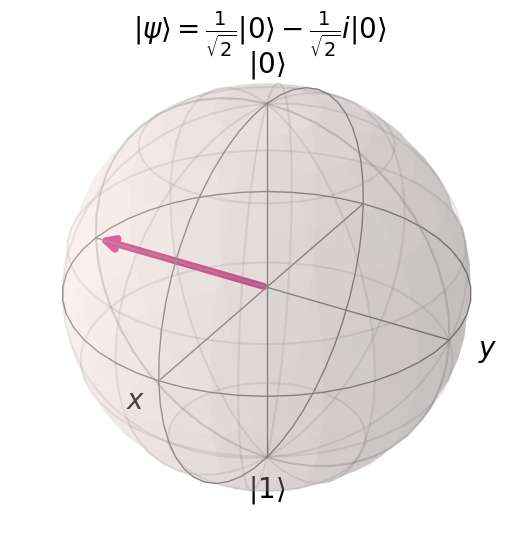

In [145]:
# Check 
beta = -1/sqrt(2)*1j
plot_bloch_vector(convert_braket_to_Bloch(beta), coord_type='spherical', 
                  title=r"$|\psi\rangle = \frac{1}{\sqrt{2}}|0\rangle-\frac{1}{\sqrt{2}}i|0\rangle$")

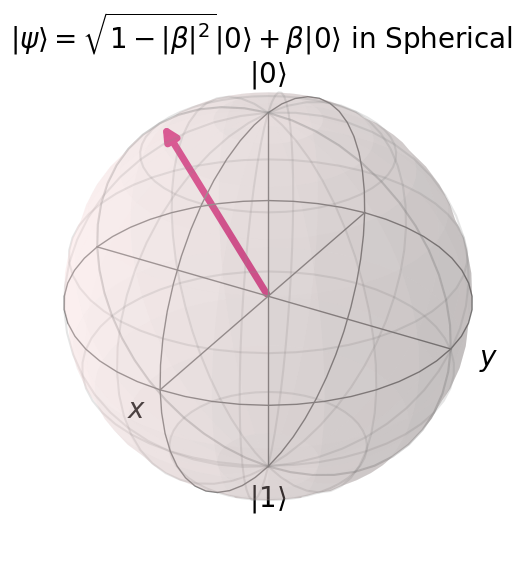

In [174]:
# Play with more values of beta to see if it matches with your expectation
beta = -1/sqrt(10)*1j
plot_bloch_vector(convert_braket_to_Bloch(beta), coord_type='spherical', 
                  title=r"$|\psi\rangle = \sqrt{1-|\beta|^2}|0\rangle+\beta|0\rangle$ in Spherical")

### Expectation value

Besides represent the quantum state on the Bloch sphere using spherical coordinates $\theta$ and $\phi$, we can also represent it with Cartesian coordinates, i.e., $(x, y, z)$. To do so, we need to evaluate the expectation value of the state in $x$, $y$ and $z$. Going back to bra-ket notation, to compute the expectation value of a state, we evaluate

$\langle Z\rangle = \langle\psi | Z | \psi\rangle = \langle\psi \big(| 0\rangle\langle 0 | - | 1\rangle\langle 1 \big)|\psi\rangle= \langle\psi | 0\rangle\langle 0 |\psi\rangle-\langle\psi | 1\rangle\langle 1 |\psi\rangle = |\langle 0 | \psi \rangle|^2 - |\langle 1 | \psi \rangle|^2$

It is important to know that the expectation value must always be real. In opflow class, these Pauli operators, such as X, Y, Z, can be used directly from the opflow class

In [351]:
X

PauliOp(Pauli('X'), coeff=1.0)

In [352]:
Y

PauliOp(Pauli('Y'), coeff=1.0)

In [353]:
Z

PauliOp(Pauli('Z'), coeff=1.0)

<div class="alert alert-block alert-success">

**Q2.3 Write a function to obtain the expectation $\langle Z \rangle$ for the arbitrary function $|\psi(\beta)\rangle$ (1 pt)**  
    
Use quantum gate operators from the opflow class and your "arbitrary_state" function to compute the expection. Note the opflow gate operator can be composited with the state in the same way using the "@" operand.
</div>

In [136]:
def expectation_Z(beta):
    ##### ==================================
    # Write your solution in here. There are more than one solution here...
    return (~arbitrary_state(beta) @ Z @ arbitrary_state(beta)).eval()
    ##### ==================================

Compare your expectation with your bloch sphere, does it make sense to you?

In [147]:
print("<Z> =", expectation_Z(beta))

<Z> = (0.7999999999999998+0j)


Similiarly, one can write the expectation function for $\langle X \rangle$ and $\langle Y \rangle$. However, since the computational bases that we are using are $|0\rangle$ and $|1\rangle$, i.e. in the $Z$-axis, we have to rotate the quantum state properly in order to measure their expectations. 

For the expectation $\langle X \rangle$, you may have guessed, we need to use a Hadamard gate (note $H^\dagger = H$): 

$\langle X\rangle = \langle\psi | X | \psi\rangle = \langle\psi | H Z H | \psi\rangle = \langle H \psi \big(| 0\rangle\langle 0 | - | 1\rangle\langle 1 \big)| H \psi\rangle= \langle H \psi | 0\rangle\langle 0 | H \psi\rangle-\langle H \psi | 1\rangle\langle 1 | H \psi\rangle = |\langle 0 | H \psi \rangle|^2 - |\langle 1 | H \psi \rangle|^2$

For the expectation $\langle Y \rangle$, it is a bit more complicated, but we will need to use a Hadamard and a $pi/2$ phase rotation gate, i.e. the S gate.

$\langle Y\rangle = \langle\psi | Y | \psi\rangle = \langle\psi | (H S^\dagger)^\dagger  Z (H S^\dagger) | \psi\rangle = \cdots = |\langle 0 | H S^\dagger \psi \rangle|^2 - |\langle 1 | H S^\dagger \psi \rangle|^2$

<div class="alert alert-block alert-success">

**Q2.4 Write a function to obtain the expectation $\langle X \rangle$ and $\langle Y \rangle$ for the arbitrary function $|\psi(\beta)\rangle$ (1 pt)**  
    
</div>

In [161]:
def expectation_X(beta):
    ##### ==================================
    # Write your solution in here. There are more than one solution here...
    return (~arbitrary_state(beta) @ ~H @ Z @ H @ arbitrary_state(beta)).eval()
    ##### ==================================
    
def expectation_Y(beta):
    ##### ==================================
    # Write your solution in here. There are more than one solution here...
    return (~arbitrary_state(beta) @ ~(H @ ~S) @ Z @ (H @ ~S) @ arbitrary_state(beta)).eval()
    ##### ==================================

<div class="alert alert-block alert-success">

**Q2.5 Write a function to obtain the cartesian coordinate in the Bloch sphere for the arbitrary function $|\psi(\beta)\rangle$ (1 pt)**  
    
Use the three expectation functions that we built earlier, write a function that return a list of three real numbers, [x, y, z]. Hint: The real part of a complex number can be extracted with ".real" attribute. For example, (1+2j).real = 1.
    
</div>

In [168]:
def get_cartesian_coordinate(beta):
    ##### ==================================
    # Write your solution in here. There are more than one solution here...
    x = expectation_X(beta).real
    y = expectation_Y(beta).real
    z = expectation_Z(beta).real
    ##### ==================================
    return [x, y, z]

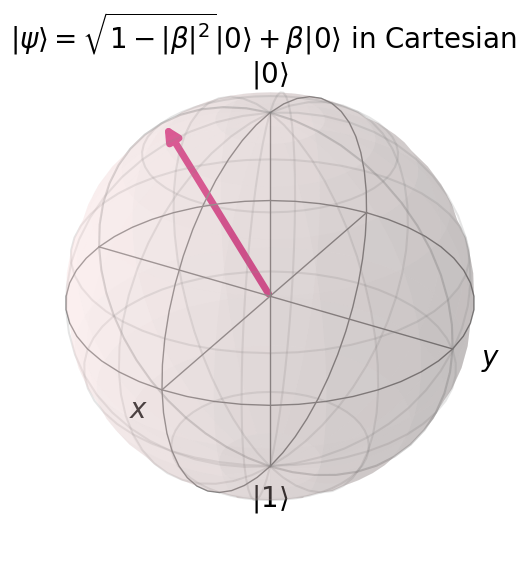

In [226]:
# Play with more values of beta to see if it matches with your previous Bloch sphere
beta = -1/sqrt(10)*1j
plot_bloch_vector(get_cartesian_coordinate(beta), coord_type='cartesian', 
                  title=r"$|\psi\rangle = \sqrt{1-|\beta|^2}|0\rangle+\beta|0\rangle$ in Cartesian")

Hooray! At this point, you should see that we verify the Braket and Bloch representations with an arbitrary quantum state that we built!

## 2.3 Introduction to statistical measurement

As we discussed earlier, practical measurement comes from statistical evaluation of the quantum circuit. In this module, we introduce two major simulator backend from Qiskit.Aer library. 

The **Statevector simulator** evaluates the quantum state exactly and is able to produce a statevector that can be visualized using Bloch sphere. This simulator serves an educational purposes and allows for theoretical testing. On the other hand, the **QASM simulator** simulates a perfect quantum computer. The measurement is obtained as statistically by repeating the quantum circuit thousands of times.

Here, we write a function to probe the arbitrary quantum state using the QASM simulator.

In [227]:
# Let's define the quantum simulator

sv_simulator = Aer.get_backend("statevector_simulator")

qasm_simulator = Aer.get_backend("qasm_simulator")

To achieve our goal, we need to find a way to efficiently initialize our quantum state on the circuit. Luckily, in Qiskit we can use the "initialize" method. See the example below to produce a $|-\rangle$ state. Note here we must measure the result explictly using the "measure_all" function. Recall, the plus state is

$|-\rangle = \frac{1}{\sqrt{2}}|0\rangle - \frac{1}{\sqrt{2}}|1\rangle$   

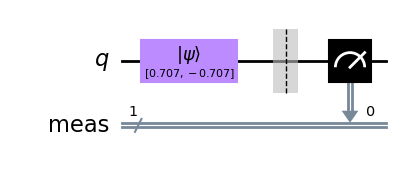

In [2]:
this_circ = QuantumCircuit(1)
this_circ.initialize([1/sqrt(2), -1/sqrt(2)])
this_circ.measure_all()
this_circ.draw('mpl')

Here, we run the quantum circuit using the QASM simulator with 1024 measurements (or shots) and visualize measurement counts in histogram using "plot_histogram".

The QASM simulator here samples the quantum circuit 1024 times, and each time the quantum state in the circuit has to collapse in the measurement, giving a single count in the measurement basis, either $|0\rangle$ or $|1\rangle$. By sampling enough shots, we can expect the histogram distribution to agree with quantum state.


{'0': 475, '1': 549}


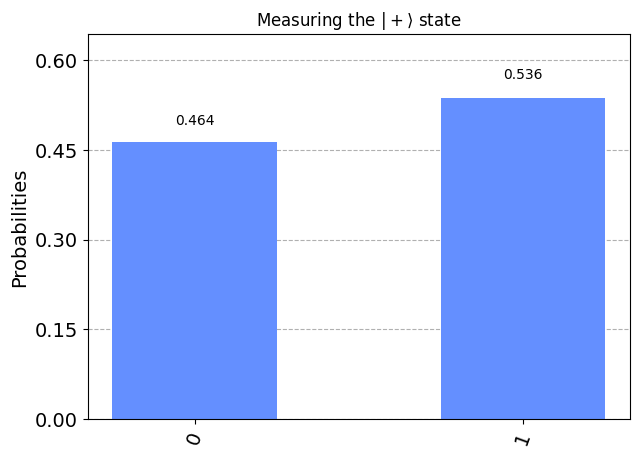

In [262]:
shots = 1024

counts = execute(this_circ, backend=qasm_simulator, shots=shots).result().get_counts()

print(counts)

plot_histogram(counts, title=r"Measuring the $|+\rangle$ state")

Here, the "counts" is returned as a Python dictionary indicating the counts for each computational basis.

Note that in Qiskit, the number of shots information is automatically converted into probability information by dividing the total number of shots. You should also observe that the relative phase information is lost in our measurement.

Now, try increase the number of shots to see if you can obtain the expected result. Or you can try decrease the number of shots to see if the measurement results deteriotates. 

<div class="alert alert-block alert-success">

**Q2.6 Build an arbitrary quantum state on the quantum circuit (1 pt)**  

Now write your own function to construct an arbitrary quantum state $|\psi(\alpha)\rangle = \alpha |0\rangle + \beta |1\rangle$ on the **quantum circuit**. Here, you will use the circuit.initialize like the example above. Your function should return a quantum circuit object.
</div>

In [345]:
def contruct_arbitrary_state_on_circuit(beta):
    ##### ==================================
    # Write your solution in here. Here you do not need to append the measurement part in this function
    circuit = QuantumCircuit(1)
    circuit.initialize([sqrt(1-abs(beta)**2), beta])
    ##### ==================================
    return circuit

Now you can check your function is correct by measuring it. Does it make sense to you? Try increase or decrease your number of shots.

Probability in |1> basis = 0.045369


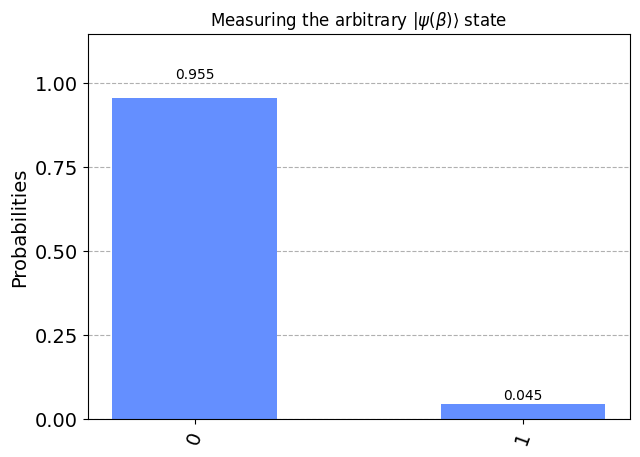

In [346]:
shots = 81920

beta = 0.213
this_circuit = contruct_arbitrary_state_on_circuit(beta)
this_circuit.measure_all()

counts = execute(this_circuit, backend=qasm_simulator, shots=shots).result().get_counts()

print("Probability in |1> basis =", beta**2)
plot_histogram(counts, title=r"Measuring the arbitrary $|\psi(\beta)\rangle$ state")


<div class="alert alert-block alert-success">

**Q2.7 Measure the expectation value $\langle Z \rangle$ of an arbitrary quantum state on the quantum circuit (1 pt)**  

From what we learned before, now write your own function to compute the $\langle Z \rangle$ expectation of $|\psi(\alpha)\rangle = \alpha |0\rangle + \beta |1\rangle$ on the **quantum circuit** using the QASM simulator. The function takes two parameters, "beta" and "shots", and returns a single real number that is the expectation value. Recall

$\langle Z\rangle = \langle\psi | Z | \psi\rangle = \langle\psi \big(| 0\rangle\langle 0 | - | 1\rangle\langle 1 \big)|\psi\rangle= \langle\psi | 0\rangle\langle 0 |\psi\rangle-\langle\psi | 1\rangle\langle 1 |\psi\rangle = |\langle 0 | \psi \rangle|^2 - |\langle 1 | \psi \rangle|^2$
    
Hint: in Python, the dictionary value can be accessed like an element. For example, counts["0"], counts["1"], etc.
</div>

In [347]:
def expectation_Z_with_QASM(beta, shots):
    ##### ==================================
    # Write your solution in here. Here
    circuit = contruct_arbitrary_state_on_circuit(beta)
    circuit.measure_all()
    counts = execute(circuit, backend=qasm_simulator, shots=shots).result().get_counts()
    expectation = (counts["0"] - counts["1"])/(counts["0"] + counts["1"])
    ##### ==================================
    return expectation

Make sure you cross check with opflow results.

In [350]:
beta = -1/sqrt(2)*1j
shots = 81920

print("Expectation <Z> with QASM =", expectation_Z_with_QASM(beta, shots=shots))
print("Expectation <Z> with opflow =", expectation_Z(beta))

Expectation <Z> with QASM = -0.0031494140625
Expectation <Z> with opflow = (2.22e-16+0j)


<div class="alert alert-block alert-success">

**Submission instructions**  
    
When you are ready, please run the following cells and email your Jupyter notebooks to meijian.li@usc.es
</div>

In [6]:
import qiskit.tools.jupyter
%qiskit_version_table

<div class="alert alert-block alert-success">

**Summary**  
    
In this Jupyter notebook, we learned to use the opflow library to manipulate quantum algebra and truly simulate an ideal quantum computer using the QASM simulator. We should understand that in practical simulation there are also qubit imperfections and measurement noises besides statistical uncertainties.
    
For interested readers, one can continue to write a function to extract the Cartesian coordinates of an arbitrary state using quantum circuit. Expectation evaulations are the key theme in today's quantum computing research. Various approaches in the family of Variational Quantum Solvers are applied widely in many disciplines of science.
   
* Farhi, Goldstone, Gutmann, [A Quantum Approximate Optimization Algorithm](https://arxiv.org/abs/1411.4028)
* Romero, Babbush, McClean, et. al., [Strategies for quantum computing molecular energies using the unitary coupled cluster ansatz](https://arxiv.org/abs/1701.02691)

Author of this exercise: Wenyang Qian   
Contact me for any question: qian.wenyang@usc.es
</div>